# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient countu
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [109]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    cityresp = requests.get(city_url)
    city_weather = cityresp.json()
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        cityresp = requests.get(city_url)
        city_weather = cityresp.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Max Temp": (city_max_temp - 273.15),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bukama
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | tongouson
Processing Record 5 of Set 1 | qamdo
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | jayapura
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | lazaro cardenas
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | island harbour
Processing Record 13 of Set 1 | ahau
City not found. Skipping...
Processing Record 14 of Set 1 | campo verde
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | santiago de cao
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | tyukhtet
Processing Reco

Processing Record 40 of Set 4 | uturoa
Processing Record 41 of Set 4 | mormugao
Processing Record 42 of Set 4 | chicxulub puerto
City not found. Skipping...
Processing Record 43 of Set 4 | priargunsk
Processing Record 44 of Set 4 | mirny
Processing Record 45 of Set 4 | miles city
Processing Record 46 of Set 4 | mahibadhoo
Processing Record 47 of Set 4 | carlsbad
Processing Record 48 of Set 4 | hirara
Processing Record 49 of Set 4 | sos'va
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | hell-ville
Processing Record 2 of Set 5 | salinopolis
Processing Record 3 of Set 5 | rongelap
Processing Record 4 of Set 5 | santa maria
Processing Record 5 of Set 5 | al 'amarah
Processing Record 6 of Set 5 | beira
Processing Record 7 of Set 5 | cable beach
City not found. Skipping...
Processing Record 8 of Set 5 | ntcheu
Processing Record 9 of Set 5 | sinop
Processing Record 10 of Set 5 | urengoy
Processing Record 11 of Set 5 | trinidad
Processing Record 12 of Set 5 | tolan

Processing Record 27 of Set 8 | batie
Processing Record 28 of Set 8 | zemio
Processing Record 29 of Set 8 | geraldton
Processing Record 30 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 31 of Set 8 | northam
Processing Record 32 of Set 8 | valley city
Processing Record 33 of Set 8 | betare oya
Processing Record 34 of Set 8 | danilov
Processing Record 35 of Set 8 | manadhoo
Processing Record 36 of Set 8 | jiwani
Processing Record 37 of Set 8 | meybod
Processing Record 38 of Set 8 | janeng
Processing Record 39 of Set 8 | samraong
Processing Record 40 of Set 8 | richards bay
Processing Record 41 of Set 8 | minacu
City not found. Skipping...
Processing Record 42 of Set 8 | crane
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | dudinka
Processing Record 45 of Set 8 | flekkefjord
Processing Record 46 of Set 8 | xinyuan
Processing Record 47 of Set 8 | sodankyla
Processing Record 48 of Set 8 | lincoln
Processing Record 49 of Set 8 | nemuro
Proce

Processing Record 15 of Set 12 | duayaw-nkwanta
Processing Record 16 of Set 12 | talakan
Processing Record 17 of Set 12 | balikpapan
Processing Record 18 of Set 12 | marudi
City not found. Skipping...
Processing Record 19 of Set 12 | itaituba
Processing Record 20 of Set 12 | paradip garh
Processing Record 21 of Set 12 | rimini
Processing Record 22 of Set 12 | louga
Processing Record 23 of Set 12 | barra de santo antonio
Processing Record 24 of Set 12 | micheweni
Processing Record 25 of Set 12 | primero de mayo
Processing Record 26 of Set 12 | kuanda
Processing Record 27 of Set 12 | fayetteville
Processing Record 28 of Set 12 | kadipur
Processing Record 29 of Set 12 | aso
-----------------------------
Data Retrieval Complete      
-----------------------------


In [110]:
#print(json.dumps(city_weather, indent=4))

In [111]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [112]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bukama,-9.2000,25.8500,21.39,98,100,2.07,CD,1702065123
1,enewetak,11.3474,162.3373,27.46,77,86,9.95,MH,1702065123
2,ribeira grande,38.5167,-28.7000,18.22,88,75,7.72,PT,1702065124
3,tongouson,5.0214,120.1328,27.30,81,21,2.71,PH,1702065124
4,qamdo,31.1667,97.2333,-7.29,74,3,2.34,CN,1702065124


In [113]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [114]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bukama,-9.2000,25.8500,21.39,98,100,2.07,CD,1702065123
1,enewetak,11.3474,162.3373,27.46,77,86,9.95,MH,1702065123
2,ribeira grande,38.5167,-28.7000,18.22,88,75,7.72,PT,1702065124
3,tongouson,5.0214,120.1328,27.30,81,21,2.71,PH,1702065124
4,qamdo,31.1667,97.2333,-7.29,74,3,2.34,CN,1702065124


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

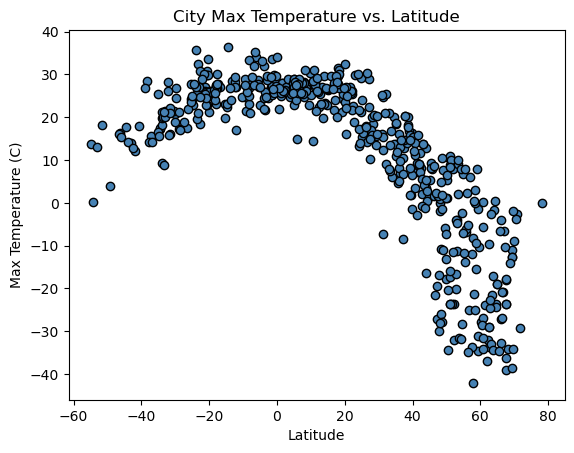

In [115]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(lat, temp, marker='o', facecolors='steelblue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Temperature vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

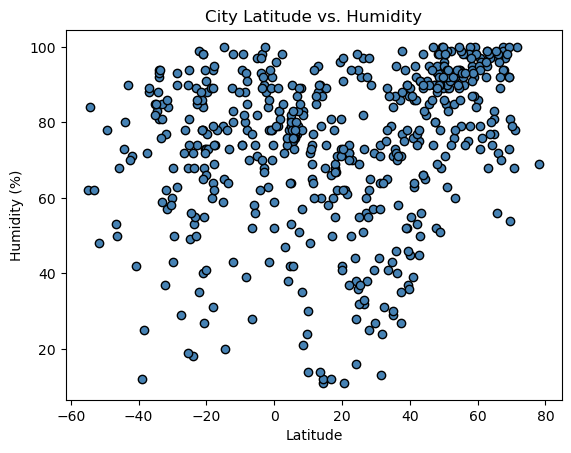

In [116]:
# Build the scatter plots for latitude vs. humidity
hum = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(lat, hum, marker='o', facecolors='steelblue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

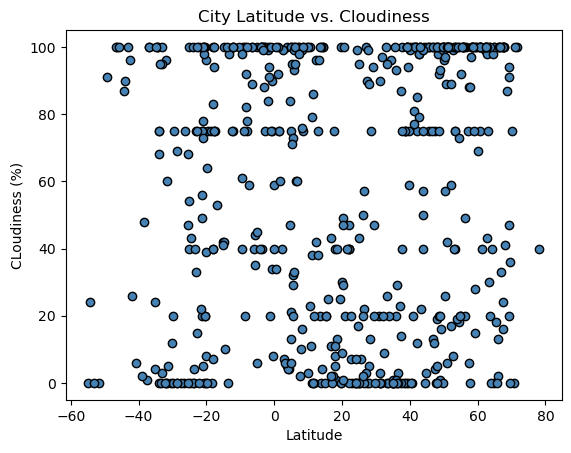

In [117]:
# Build the scatter plots for latitude vs. cloudiness
cloudy = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(lat, cloudy, marker='o', facecolors='steelblue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('CLoudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

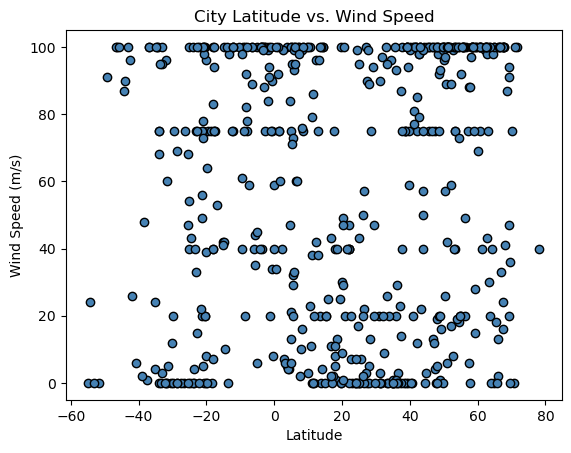

In [118]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(lat, cloudy, marker='o', facecolors='steelblue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[ city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,enewetak,11.3474,162.3373,27.46,77,86,9.95,MH,1702065123
2,ribeira grande,38.5167,-28.7000,18.22,88,75,7.72,PT,1702065124
3,tongouson,5.0214,120.1328,27.30,81,21,2.71,PH,1702065124
4,qamdo,31.1667,97.2333,-7.29,74,3,2.34,CN,1702065124
5,katsuura,35.1333,140.3000,13.79,71,0,5.43,JP,1702065125


In [121]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bukama,-9.2000,25.8500,21.39,98,100,2.07,CD,1702065123
7,jayapura,-2.5333,140.7000,24.66,88,100,2.02,ID,1702065125
8,adamstown,-25.0660,-130.1015,22.77,81,100,5.84,PN,1702065125
10,ushuaia,-54.8000,-68.3000,13.81,62,0,3.09,AR,1702064848
12,campo verde,-20.4167,-54.0667,26.25,73,100,3.76,BR,1702065126


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is:0.7261659984485392


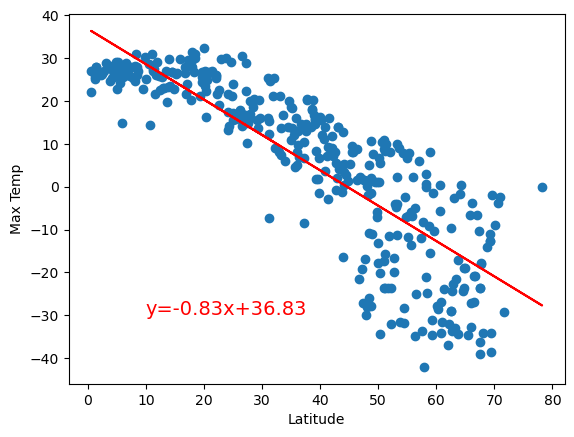

In [124]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.text(10,-30, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

 The r-value is:0.4723221087399314


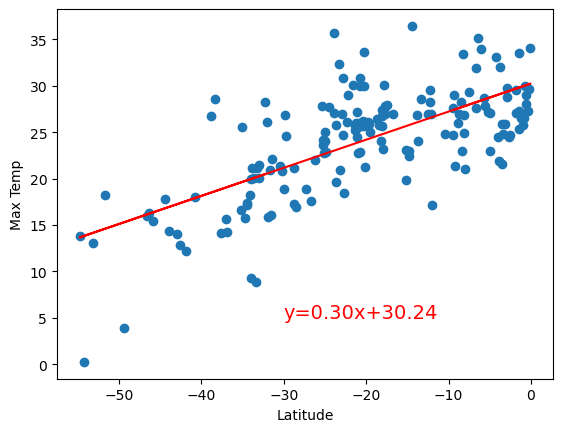

In [126]:
# Linear regression on Southern Hemisphere
x2_values = southern_hemi_df["Lat"]
y2_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values,y2_values)
regress_values = x2_values * slope + intercept

plt.scatter(x2_values, y2_values)
plt.plot(x2_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.text(-30,5, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere, max temperatures decrease as latitude increases.
For the Southern Hemisphere, max temperatures increase as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

 The r-value is:0.15887420849514974


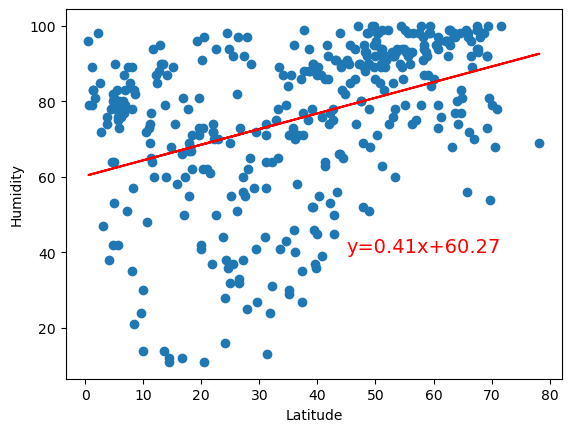

In [128]:
x3_values = northern_hemi_df["Lat"]
y3_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x3_values,y3_values)
regress_values = x3_values * slope + intercept

plt.scatter(x3_values, y3_values)
plt.plot(x3_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.text(45,40, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

 The r-value is:0.02465058369027865


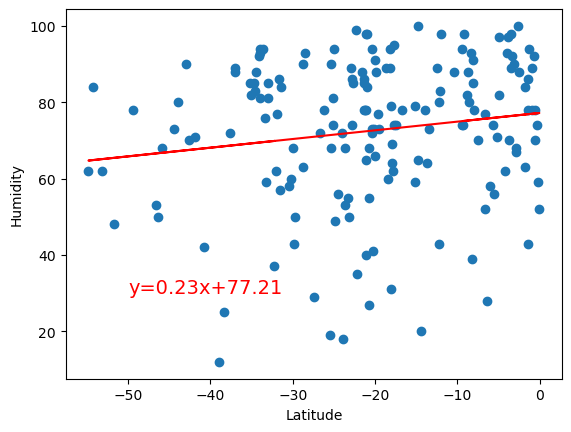

In [132]:
x22_values = southern_hemi_df["Lat"]
y22_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x22_values,y22_values)
regress_values = x22_values * slope + intercept

plt.scatter(x22_values, y22_values)
plt.plot(x22_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.text(-50,30, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** For the Norhtern Hemisphere humidity increased as latitude increased. For Southern Hemisphere humidity increased as latitude increased as well.

### Cloudiness vs. Latitude Linear Regression Plot

 The r-value is:0.03883033205723428


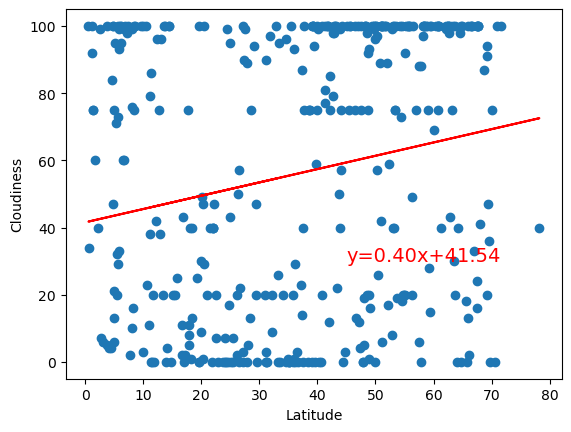

In [135]:
x4_values = northern_hemi_df["Lat"]
y4_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x4_values,y4_values)
regress_values = x4_values * slope + intercept

plt.scatter(x4_values, y4_values)
plt.plot(x4_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(45,30, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

 The r-value is:0.06498370850775476


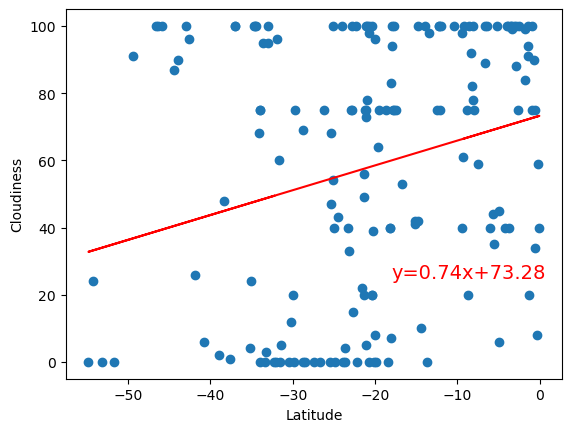

In [136]:
x23_values = southern_hemi_df["Lat"]
y23_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x23_values,y23_values)
regress_values = x23_values * slope + intercept

plt.scatter(x23_values, y23_values)
plt.plot(x23_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(-18,25, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, the regression line shows that cloudiness increses as latitude increases. But when you look at the graph, you cannot draw any conclusions of correlation. For the Southern Hemisphere, the regression line also shows that cloudiness increases as latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

 The r-value is:0.0001297651610628829


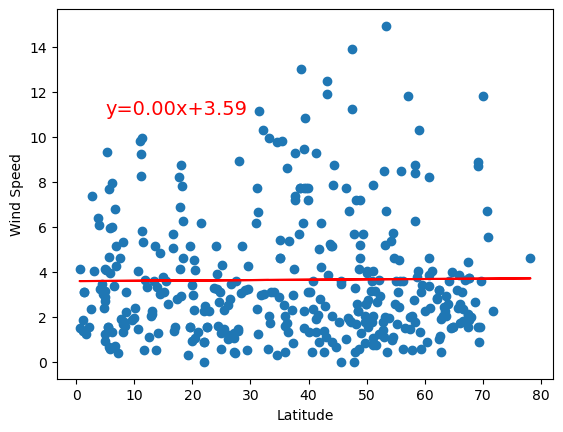

In [137]:
x5_values = northern_hemi_df["Lat"]
y5_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x5_values,y5_values)
regress_values = x5_values * slope + intercept

plt.scatter(x5_values, y5_values)
plt.plot(x5_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(5,11, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

 The r-value is:0.07624948531673931


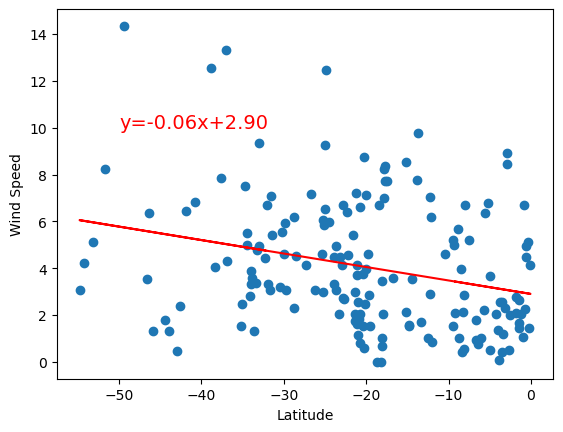

In [138]:
x24_values = southern_hemi_df["Lat"]
y24_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x24_values,y24_values)
regress_values = x24_values * slope + intercept

plt.scatter(x24_values, y24_values)
plt.plot(x23_values, regress_values, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(-50,10, 'y={:.2f}x+{:.2f}'.format(slope,intercept), color='red', size=14)

print(f" The r-value is:{rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, wind speed stays pretty much the same as latitude increases. For the Southern Hemisphere, wind speed decreases as latitude increases.